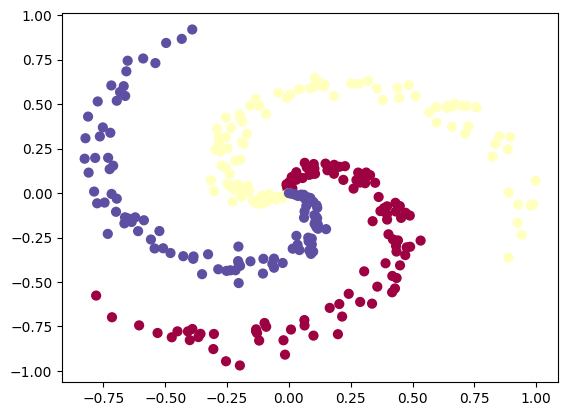

In [3]:
import matplotlib.pyplot as plt
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [4]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split

In [5]:
#turn data into tensors
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.LongTensor)

In [9]:
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
len(X_train), len(y_train)

(240, 240)

In [13]:
len(X_test)

60

In [14]:
class CS231nModel(nn.Module):
    def __init__(self,input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack=nn.Sequential(
            nn.Linear(in_features=input_features,out_features=hidden_units),
            nn.ReLU(),    
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_features),
        )
     
    def forward(self,x):
        return self.linear_layer_stack(x)
    
model_A=CS231nModel(input_features=2,
                  output_features=3,
                 hidden_units=8)
model_A

CS231nModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=3, bias=True)
  )
)

In [16]:
#loss function and optimizer
#crossentropy loss
loss_fn=nn.CrossEntropyLoss()

#creating optimizer
optimizer= torch.optim.Adam(params=model_A.parameters(),lr=0.1)

In [19]:
y_pred_probs= torch.softmax(y_logits,dim=1)
print(y_pred_probs[:5])
print(y_logits[:5])

tensor([[0.2753, 0.3073, 0.4174],
        [0.2777, 0.3044, 0.4179],
        [0.2855, 0.2876, 0.4269],
        [0.2790, 0.3038, 0.4172],
        [0.2628, 0.3145, 0.4227]])
tensor([[-0.1242, -0.0142,  0.2919],
        [-0.1325, -0.0406,  0.2764],
        [-0.0846, -0.0773,  0.3176],
        [-0.1180, -0.0330,  0.2842],
        [-0.1430,  0.0364,  0.3322]])


In [20]:
#convert predition probablities
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
# #getting predition probablities
model_A.eval()
with torch.inference_mode():
    y_logits = model_A(X_test)
y_preds[:10]

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
#calc accuracy
def acc_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred)) * 100
    return acc

In [32]:
#training loop
torch.manual_seed(42)
epochs=100
for epoch in range(epochs):
    model_A.train()
    
    y_logits=model_A(X_train)
    
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)
    
    loss= loss_fn(y_logits,y_train.type(torch.LongTensor))
    
    acc=acc_fn(y_true=y_train,
               y_pred=y_pred)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    #testing
    model_A.eval()
    with torch.inference_mode():
        test_logits= model_A(X_test)
        
        test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)
        
        test_loss = loss_fn(test_logits, y_test)
        
        test_acc= acc_fn(y_true=y_test,
                         y_pred=test_preds)
        
    #print 
    #print out whats happening
    if epoch%10==0:
        print(f"Epoch: {epoch} | loss: {loss: .5f}, Acc:{acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        

Epoch: 0 | loss:  1.13787, Acc:32.50% | Test loss: 1.08315, Test acc: 36.67%
Epoch: 10 | loss:  0.74171, Acc:62.08% | Test loss: 0.77279, Test acc: 51.67%
Epoch: 20 | loss:  0.56105, Acc:67.08% | Test loss: 0.67609, Test acc: 55.00%
Epoch: 30 | loss:  0.44434, Acc:76.25% | Test loss: 0.49793, Test acc: 66.67%
Epoch: 40 | loss:  0.26693, Acc:89.58% | Test loss: 0.25280, Test acc: 95.00%
Epoch: 50 | loss:  0.11870, Acc:95.83% | Test loss: 0.09083, Test acc: 98.33%
Epoch: 60 | loss:  0.07769, Acc:97.08% | Test loss: 0.04131, Test acc: 100.00%
Epoch: 70 | loss:  0.05743, Acc:98.33% | Test loss: 0.02127, Test acc: 100.00%
Epoch: 80 | loss:  0.04775, Acc:98.33% | Test loss: 0.01561, Test acc: 100.00%
Epoch: 90 | loss:  0.04100, Acc:99.17% | Test loss: 0.01184, Test acc: 100.00%


In [34]:
import requests
from pathlib import Path

#download helper function
if Path("helper_functions.py").is_file():
    print('already downloaded')
else:
    print('downloading....')
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

already downloaded


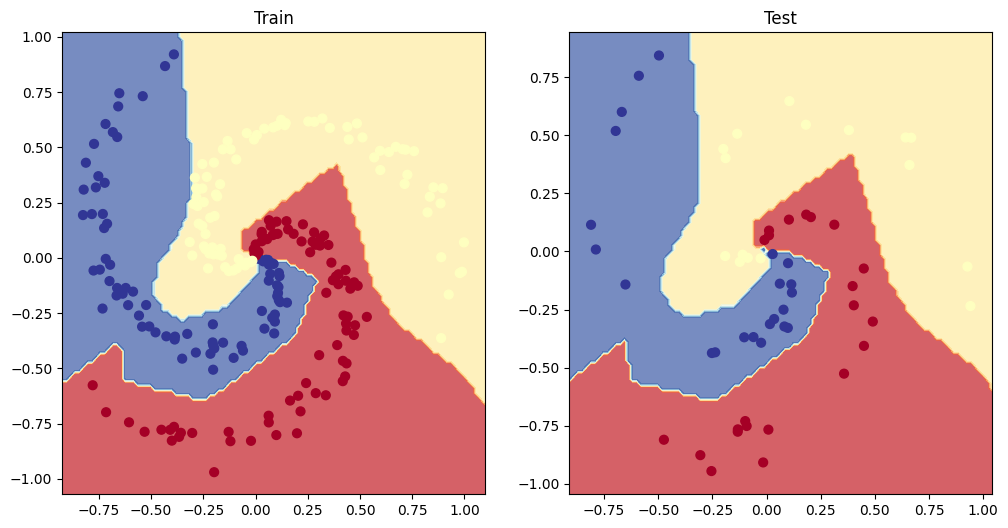

In [36]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_A, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_A, X_test, y_test)